In [88]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
from collections import Counter
import numpy as np

# Charts the 25 most common fields and their frequency
def chart_most_common(field):
    company_counter = Counter(field)
    common_companies = [company for company, count in company_counter.most_common(25)]
    common_companies_count = [count / 2333 for company, count in company_counter.most_common(25)] 
    
    indexes = np.arange(len(common_companies))
    width = 1

    plt.bar(indexes, common_companies_count, width)
    plt.xticks(indexes + width * 0.5, common_companies)
    plt.xticks(rotation=90)
    plt.show()

In [90]:
df = pd.read_csv('omni data.csv', index_col = False)

df.drop(['images/0', 'images/1', 'images/2', 'images/3', 'images/4', 'images/5', 'images/6', 'images/7', 'images/8', 'key_image', 'owner/avatar'], axis=1, inplace=True)
df['favorited'] = df['favorited'].astype(int)
df['is_shared'] = df['is_shared'].astype(int)
df['is_owner'] = df['is_owner'].astype(int)
df['is_rentable'] = df['is_rentable'].astype(int)
df['is_borrowable'] = df['is_borrowable'].astype(int)
df['allow_omni_pricing'] = df['allow_omni_pricing'].astype(int)
df['rent_price_day'] = df['rent_price_day'] / 100
df['rent_price_week'] = df['rent_price_week'].fillna(0)
df['rent_price_week'] = df['rent_price_week'] / 100
df['rent_price_month'] = df['rent_price_month'].fillna(0)
df['rent_price_month'] = df['rent_price_month'] / 100
df.columns

Index(['id', 'name', 'favorited', 'notes', 'status', 'category', 'stack_id',
       'stack_size', 'type', 'brand', 'color', 'size', 'last_checked_in',
       'authorization', 'recipient_user_name', 'availability', 'is_shared',
       'is_owner', 'owner/id', 'owner/first_name', 'owner/last_name',
       'owner/name', 'owner/username', 'owner/items_count',
       'owner/friends_count', 'owner/is_friend', 'is_rentable',
       'is_borrowable', 'rent_audit_status', 'rent_price_day',
       'rent_price_week', 'rent_price_month', 'rating', 'allow_omni_pricing'],
      dtype='object')

In [91]:
df.head()

,id,name,favorited,notes,status,category,stack_id,stack_size,type,brand,...,owner/friends_count,owner/is_friend,is_rentable,is_borrowable,rent_audit_status,rent_price_day,rent_price_week,rent_price_month,rating,allow_omni_pricing
0,d8cbc7e6-1338-4851-9c6e-809d6fcf6fcb,Sous Vide,0,It’s incredible. Worth the try,checked-in,Home Goods And Tools,633b1fcece143c6904519c621397840c,1,standard item,Wancle,...,1,False,1,0,accepted,5.0,0.0,0.0,5.0,0
1,28865257-7fb5-46ff-8520-3b2fd2df58df,Balance Board w/ Roller,0,"The Indo Board is designed to improve balance,...",checked-in,Sports And Recreation,e484203f3d77a3f94c82bd83a9e0da1f,1,large item,INDO Board,...,0,False,1,0,accepted,2.0,0.0,0.0,0.0,0
2,e1308759-4be2-4574-93cb-5881258f78b7,17ft Telescoping Ladder,0,This folding ladder quickly converts 20 workin...,checked-in,Home Goods And Tools,c678774ffb4551da1df0100f81ad49a7,1,large item,Werner,...,2,False,1,0,accepted,7.0,0.0,0.0,5.0,0
3,99fdfcce-30dc-4c86-b818-d2e514f9219a,Kayak,0,This is the original Oru Kayak from Kickstarte...,checked-in,Sports And Recreation,ec515a6689f25c349dde069d1218bb22,1,large item,Oru Kayak,...,0,False,1,0,accepted,10.0,0.0,0.0,0.0,0
4,c4aafb42-483f-40d0-8514-f58ff5bb4644,Boosted Board,0,Take her for a spin!,checked-in,Sports And Recreation,92f217ff3846dd0e04a11dc3696b3f43,1,standard item,Boosted Boards,...,0,False,1,0,accepted,15.0,0.0,0.0,5.0,0


In [92]:
df.describe()

,favorited,stack_size,last_checked_in,recipient_user_name,is_shared,is_owner,owner/items_count,owner/friends_count,is_rentable,is_borrowable,rent_price_day,rent_price_week,rent_price_month,rating,allow_omni_pricing
count,2333.000000,2333.0,2.333000e+03,0.0,2333.0,2333.0,2333.000000,2333.000000,2333.0,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.0
mean,0.028290,1.0,1.486636e+09,NaN,0.0,0.0,84.671239,13.854694,1.0,0.296614,6.598371,0.016202,0.061723,0.241963,0.0
std,0.165835,0.0,2.378244e+07,NaN,0.0,0.0,97.055109,20.971942,0.0,0.456863,22.087331,0.782590,2.981296,1.054815,0.0
min,0.000000,1.0,1.426076e+09,NaN,0.0,0.0,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.0,1.464921e+09,NaN,0.0,0.0,17.000000,0.000000,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.0,1.495246e+09,NaN,0.0,0.0,48.000000,3.000000,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.0,1.508512e+09,NaN,0.0,0.0,136.000000,25.000000,1.0,1.000000,8.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.0,1.516504e+09,NaN,0.0,0.0,611.000000,92.000000,1.0,1.000000,1000.000000,37.800000,144.000000,5.000000,0.0


In [93]:
df.sort_values('rent_price_day', ascending=False).head(10)

,id,name,favorited,notes,status,category,stack_id,stack_size,type,brand,...,owner/friends_count,owner/is_friend,is_rentable,is_borrowable,rent_audit_status,rent_price_day,rent_price_week,rent_price_month,rating,allow_omni_pricing
1922,39d1da68-aa90-4edc-97fe-c2014f309703,The Namkung Ceramic Cyborg Art,0,"A ceramic depiction of Anika Namkung, as a Cyb...",checked-in,Home Goods And Tools,258679cc6db90afe31c353158472dbb3,1,standard item,NaN,...,30,False,1,0,accepted,1000.0,0.0,0.0,0.0,0
166,ae7ef2d1-ed60-439e-9d41-04e98b348cb2,"Storm Trooper Costume - Up To 5'8""",0,This is a $2500 costume. Please handle with ca...,checked-in,Apparel,cad24a9ed15d60be2206667f56a8d034,1,standard item,Imperial,...,1,False,1,1,accepted,200.0,0.0,0.0,0.0,0
2037,b3cf0845-a37d-4080-91e3-62d3a07314d3,Normann Round Side Table,0,NaN,checked-in,Other,c28bc56ba4ed33ef954174b99f249f60,1,large item,NaN,...,5,False,1,0,accepted,75.0,0.0,0.0,0.0,0
309,cbba368e-6cf6-41bc-b673-b8c7924efca3,Dress,0,NaN,checked-in,Apparel,487d07e2de1bcd7c85b881aff0dd394f,1,standard item,Diane von Furstenberg,...,3,False,1,0,accepted,75.0,0.0,0.0,0.0,0
329,cd932ee0-96cf-4cd1-9cc5-8b21226083e4,Camera Bag w/ Camera,0,Older film (not digital) camera with lens and ...,checked-in,Electronics,6f26fcf1ab9f98fa026e1030c2844781,1,standard item,Nikon,...,5,False,1,0,accepted,50.0,0.0,0.0,0.0,0
759,facdfd4f-dda3-47de-94dd-d457313526ff,T-Shirt,0,NaN,checked-in,Apparel,fa8945fe4973c64817d810e2b28887d5,1,standard item,A magical shirt with 37% chance of getting you...,...,0,False,1,0,accepted,50.0,0.0,0.0,0.0,0
31,b3e0c00a-af64-49f6-8cd2-5bd50d4aed8b,Daft Punk Helmet And Gloves,0,Rent it use it love it return it,checked-in,Sports And Recreation,9d986f08e49db6bf636e9a95c3986ff0,1,standard item,Hand made,...,1,False,1,0,accepted,50.0,0.0,0.0,0.0,0
1613,b3ec0fc0-9b08-4954-a83a-f7bf80afcc8f,Fur Vest W/ Garment Bag - No Tags,0,NaN,checked-in,Apparel,a51256fdceb578ff5c5d6828ff2edac0,1,standard item,NaN,...,5,False,1,0,accepted,50.0,0.0,0.0,0.0,0
1633,5dd63767-7f3f-4a15-b58a-b25e625cf5a1,Chewbacca Costume,0,Rrrrrrr-ghghghghgh!,checked-in,Apparel,87b67e46f8544587a3c7097c9653a173,1,standard item,Star Wars,...,1,False,1,0,accepted,50.0,0.0,0.0,0.0,0
1326,4eed4106-5586-45db-b13f-f19d95f06e7a,Dress,0,NaN,checked-in,Apparel,589a994264a369e9970d90838128070a,1,standard item,Burberry,...,0,False,1,0,accepted,50.0,0.0,0.0,0.0,0


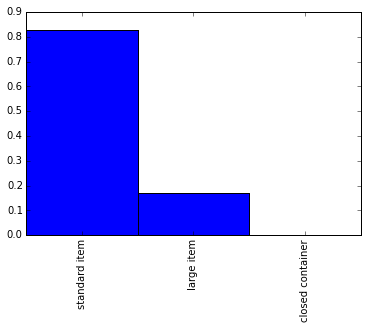

In [94]:
chart_most_common(df['type'])

In [95]:
df[df.category == 'Other'].sort_values('rent_price_day', ascending=False).head()

,id,name,favorited,notes,status,category,stack_id,stack_size,type,brand,...,owner/friends_count,owner/is_friend,is_rentable,is_borrowable,rent_audit_status,rent_price_day,rent_price_week,rent_price_month,rating,allow_omni_pricing
2037,b3cf0845-a37d-4080-91e3-62d3a07314d3,Normann Round Side Table,0,NaN,checked-in,Other,c28bc56ba4ed33ef954174b99f249f60,1,large item,NaN,...,5,False,1,0,accepted,75.0,0.0,0.0,0.0,0
365,d119f013-b973-4392-af98-2f092fbdfda9,Rain Boots,0,NaN,checked-in,Other,9ad191365855d458cc93a321603b71b0,1,standard item,Burberry,...,0,False,1,0,accepted,25.0,0.0,0.0,0.0,0
1771,b8185f68-133c-4189-a64e-7d57f036e67d,Rain Boots,0,NaN,checked-in,Other,3ca1b3838ba908bf3e8aa1e43e2872ee,1,standard item,Burberry,...,0,False,1,0,accepted,25.0,0.0,0.0,0.0,0
198,67c1ddda-9295-470d-be03-bc6324162eb5,Guest Room Kit - Rent for $20/day,0,NaN,checked-in,Other,4b423557663cd4c6aacc760ad349d024,1,standard item,NaN,...,40,False,1,0,accepted,20.0,0.0,0.0,0.0,0
601,ebac8844-64bb-4f64-95be-a8f2b708edfb,Trombone,0,Get seventy five of your best friends together...,checked-in,Other,acd0333c25addddeb5d2f8fff67c5089,1,standard item,Bach 42k Tenor Trombone,...,0,False,1,0,accepted,20.0,0.0,0.0,0.0,0


In [96]:
averages = df.groupby(['category']).mean()
averages['rent_price_day']

category
Apparel                  9.260177
Books And Media          2.185366
Electronics              4.830688
Home Goods And Tools     6.428981
Other                    9.421053
Sports And Recreation    6.478723
Toys & Collectibles      4.000000
Name: rent_price_day, dtype: float64

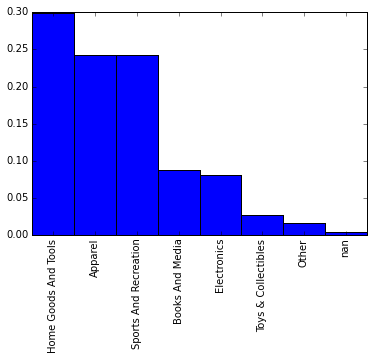

In [97]:
chart_most_common(df['category'])

In [98]:
import json
import csv
x = []
with open('omni_listings.json') as data_file:    
    listing_data = json.load(data_file)
    listing_data = list(listing_data.values())
print(len(listing_data))
y = pd.DataFrame(listing_data)
z = pd.DataFrame.copy(y)
z.head()

2333


,allow_omni_pricing,authorization,availability,bookings,borrow_dates,borrow_status,brand,category,code,color,...,recipient_user_name,rent_audit_status,rent_price_day,rent_price_month,rent_price_week,size,stack_id,stack_size,status,type
0,False,owned,public,[],[],NaN,National Geographic,Toys & Collectibles,NaN,NaN,...,NaN,accepted,1000.0,NaN,NaN,Hobby Series,e6bfd1eb681c09f8b4ef8264654a1777,1.0,checked-in,standard item
1,False,owned,public,[],[],NaN,NaN,Books And Media,NaN,NaN,...,NaN,accepted,200.0,NaN,NaN,None,642109c18f5061ae98b3e0940e045e36,1.0,checked-in,standard item
2,False,owned,public,[],[],NaN,Express,Apparel,NaN,NaN,...,NaN,accepted,500.0,NaN,NaN,XS,0ae843cd58f4e8ce29006b27c92cbe25,1.0,checked-in,standard item
3,False,owned,public,[],[],NaN,NaN,Apparel,NaN,NaN,...,NaN,accepted,1500.0,NaN,NaN,None,3f6cba44a2d7518aa721b046935c1e68,1.0,checked-in,standard item
4,False,owned,public,[],[],NaN,NaN,Books And Media,NaN,NaN,...,NaN,accepted,500.0,NaN,NaN,None,24a110bcb4c53b70779ad9bb34a18841,1.0,checked-in,standard item


In [117]:
bookings = z.loc[z['bookings'].apply(lambda x: len(str(x)) > 3)]
bookings.rent_price_day = bookings.rent_price_day / 100
rentals = list(bookings['bookings'])
rentals

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[[{'end': '1517011198',
   'member': {'avatar': 'https://omni.imgix.net/avatars/7fcb8df3-9b24-42f3-8d2f-69d79bb8dbc0/930C6C98-7501-43BE-A534-E785939FA85E',
    'first_name': 'Victoriađ\x9f\x99\x88',
    'friends_count': 15,
    'id': '7fcb8df3-9b24-42f3-8d2f-69d79bb8dbc0',
    'is_friend': False,
    'items_count': 177,
    'last_name': 'Solorzanhđ\x9f\x98Ž',
    'name': 'Victoriađ\x9f\x99\x88 Solorzanhđ\x9f\x98Ž',
    'username': 'vix'},
   'name': 'Mixer',
   'record_type_name': 'Blockage',
   'row': 1,
   'sales_order_uuid': '9f874005-ebf9-4490-9dbd-8ddc380c9271',
   'start': '1516752000',
   'uuid': '09d72e55-3649-493f-8dd6-12fe610de4e4'},
  {'end': '1517529598',
   'member': {'avatar': 'https://omni.imgix.net/avatars/7fcb8df3-9b24-42f3-8d2f-69d79bb8dbc0/930C6C98-7501-43BE-A534-E785939FA85E',
    'first_name': 'Victoriađ\x9f\x99\x88',
    'friends_count': 15,
    'id': '7fcb8df3-9b24-42f3-8d2f-69d79bb8dbc0',
    'is_friend': False,
    'items_count': 177,
    'last_name': 'Solorzan

In [100]:
rentals = z.loc[z['borrow_dates'].apply(lambda x: len(str(x)) > 3)]
rentals.columns

Index(['allow_omni_pricing', 'authorization', 'availability', 'bookings',
       'borrow_dates', 'borrow_status', 'brand', 'category', 'code', 'color',
       'error', 'favorited', 'id', 'images', 'is_borrowable', 'is_owner',
       'is_rentable', 'is_rented', 'is_shared', 'key_image', 'last_checked_in',
       'name', 'notes', 'owner', 'rating', 'recipient_user_name',
       'rent_audit_status', 'rent_price_day', 'rent_price_month',
       'rent_price_week', 'size', 'stack_id', 'stack_size', 'status', 'type'],
      dtype='object')

In [101]:
borrowed = rentals.filter(['name', 'borrow_dates', 'id', 'rent_price_day'])
borrowed.rent_price_day = borrowed.rent_price_day / 100

In [110]:
def getDaysBetweenTimestamps(borrow):
    if not borrow['end'] or not borrow['start']:
        return 0
    return abs(int(borrow['end']) - int(borrow['start']))/60/60/24
borrowed['days'] = borrowed['borrow_dates'].apply(lambda x: np.ceil(sum([getDaysBetweenTimestamps(borrow) for borrow in x])))
borrowed['revenue'] = borrowed.days * borrowed.rent_price_day
borrowed

,name,borrow_dates,id,rent_price_day,days,revenue
840,Wheelchair,"[{'end': 1519718399, 'start': 1519286400}, {'e...",c4757da0-dfc2-438d-873c-ba585d9400bb,7.0,6.0,42.0
1108,Chocolate Fountain,"[{'end': 1517126399, 'start': 1516953600}]",cb432703-052a-4646-83b6-81e7270e7189,8.0,2.0,16.0
1241,Boosted Board,"[{'end': 1520495999, 'start': 1520409600}]",c4aafb42-483f-40d0-8514-f58ff5bb4644,15.0,1.0,15.0
1550,17ft Telescoping Ladder,"[{'end': 1517126399, 'start': 1517040000}]",e1308759-4be2-4574-93cb-5881258f78b7,7.0,1.0,7.0
1924,Bike Lock W/ Key,"[{'end': 1516867199, 'start': 1516089600}]",8b615d33-c712-415d-8226-0d27f9878487,1.0,9.0,9.0
1955,Bike - Townie 7D Vanilla,"[{'end': 1517126399, 'start': 1517040000}]",c6f66fe5-fc8f-46d9-b709-f9beb4eafc83,5.0,1.0,5.0
1966,Apple Macbook Air Charger,"[{'end': 1517126399, 'start': 1516780800}]",883338dd-bbb8-4661-a75d-3848df60fccb,2.0,4.0,8.0
2096,Giant Jenga Game,"[{'end': 1517126399, 'start': 1516953600}]",cc02202e-8b77-4cc1-ae5d-dc0b00f422fe,10.0,2.0,20.0


In [118]:
borrowed.describe()

,rent_price_day,days,revenue
count,8.000000,8.000000,8.000000
mean,6.875000,3.250000,15.250000
std,4.454131,2.915476,11.973184
min,1.000000,1.000000,5.000000
25%,4.250000,1.000000,7.750000
50%,7.000000,2.000000,12.000000
75%,8.500000,4.500000,17.000000
max,15.000000,9.000000,42.000000


In [111]:
sum(borrowed.revenue)

122.0

In [128]:
max(borrowed['borrow_dates'].apply(lambda x: max([borrow['start'] for borrow in x])))

1520409600

In [124]:
bookings = bookings.filter(['name', 'rent_price_day', 'bookings'])
bookings['days_rented'] = bookings.bookings.apply(lambda x: np.ceil(sum([getDaysBetweenTimestamps(y) for y in x])))
bookings['revenue'] = bookings.days_rented * bookings.rent_price_day
recent_bookings = bookings[bookings.days_rented < 100]
recent_bookings

,name,rent_price_day,bookings,days_rented,revenue
218,Mixer,1.0,[{'sales_order_uuid': '9f874005-ebf9-4490-9dbd...,18.0,18.0
595,Japanese Traditional Futon Mattress,10.0,[{'sales_order_uuid': '4d030870-2ac7-47cf-b0f2...,0.0,0.0
840,Wheelchair,7.0,[{'sales_order_uuid': '8836c856-70b0-423e-b2b8...,10.0,70.0
1108,Chocolate Fountain,8.0,[{'sales_order_uuid': '2fc48ab8-fce6-4933-8453...,4.0,32.0
1241,Boosted Board,15.0,[{'sales_order_uuid': '1ba88e05-a3b7-4ed0-b8bc...,3.0,45.0
1550,17ft Telescoping Ladder,7.0,[{'sales_order_uuid': '5a34c905-341e-4d77-b18f...,3.0,21.0
1924,Bike Lock W/ Key,1.0,[{'sales_order_uuid': '109f953e-1028-4855-93fb...,11.0,11.0
1955,Bike - Townie 7D Vanilla,5.0,[{'sales_order_uuid': '7f4905ba-0362-4608-b0cc...,3.0,15.0
1966,Apple Macbook Air Charger,2.0,[{'sales_order_uuid': '306806bc-7e7e-4828-8e01...,6.0,12.0
2000,Yoga Mat,5.0,[{'sales_order_uuid': '874603e7-8599-4b21-9a8b...,0.0,0.0


In [123]:
sum(recent_bookings.revenue)

274.0